In [28]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
import os
import matplotlib.pyplot as plt#visualization
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

df.dropna(inplace=True)
df = df.reset_index()[df.columns]
for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()

    X=df.copy()

#Tenure to categorical column
def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

X["tenure"]=X["tenure"].map(tenure_lab)

X=X.drop('Churn',1)
Y=df.Churn
X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()

num_cols   = [x for x in X.columns if x not in todummy_list]
todummy_list.remove('tenure')
num_cols.insert(3,'tenure')

for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
    
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

normalized_X = preprocessing.normalize(X[num_cols])
normalized_X = pd.DataFrame(normalized_X,columns=num_cols)
X=X.drop(num_cols,1)
X=pd.concat([X,normalized_X ],axis=1)
X = X.merge(normalized_X,left_index=True,right_index=True,how = "left")
le = LabelEncoder()
Y= le.fit_transform(Y)


'''std = StandardScaler().fit(X[num_cols])
x_transformed=std.transform(X[num_cols])
x_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)
x_kf=X.drop(num_cols,1)
x_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)'''

'std = StandardScaler().fit(X[num_cols])\nx_transformed=std.transform(X[num_cols])\nx_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)\nx_kf=X.drop(num_cols,1)\nx_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)'

In [23]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
    print("tpr=",tpr," and 1-fpr=", 1-fpr)

    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns

    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


In [20]:
'''-------------------------FEATURE SELECTION(chi2)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(chi2, k=10)
fit=test.fit(X,Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
X_new = fit.transform(X)
# summarize selected features
print(X_new[0:5,:])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

[9.997e+01 4.241e+02 4.473e+01 1.050e+02 1.766e+02 4.862e+02 2.855e+02
 1.593e+01 2.855e+02 1.732e+01 2.855e+02 1.354e+02 2.855e+02 2.022e+01
 2.855e+02 3.121e+01 2.855e+02 1.472e+02 3.721e+02 2.855e+02 8.682e-01
 6.515e+00 9.295e-02 1.313e+02 8.186e+01 1.335e+02 2.543e-01 6.796e+02
 3.653e+03 6.296e+05]
[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 2.985e+01 2.985e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00 5.695e+01 1.890e+03]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 5.385e+01 1.082e+02]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00 4.230e+01 1.841e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  1.000e+00 7.070e+01 1.517e+02]]


In [24]:
X_new


array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.985e+01,
        2.985e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 5.695e+01,
        1.890e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 5.385e+01,
        1.082e+02],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.960e+01,
        3.464e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 7.440e+01,
        3.066e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 5.000e+00, 1.057e+02,
        6.844e+03]])

		--------------LOGISTIC REGRESSION_Processed(chi2)----------------



             precision    recall  f1-score   support

          0       0.81      0.93      0.87      1038
          1       0.67      0.40      0.50       369

avg / total       0.77      0.79      0.77      1407

[[964  74]
 [222 147]]
tpr= [0.    0.398 1.   ]  and 1-fpr= [1.    0.929 0.   ]


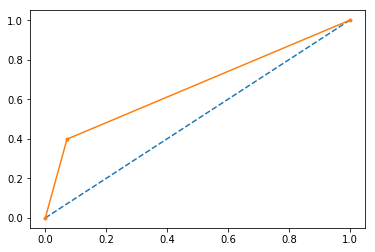

AUC: 0.664


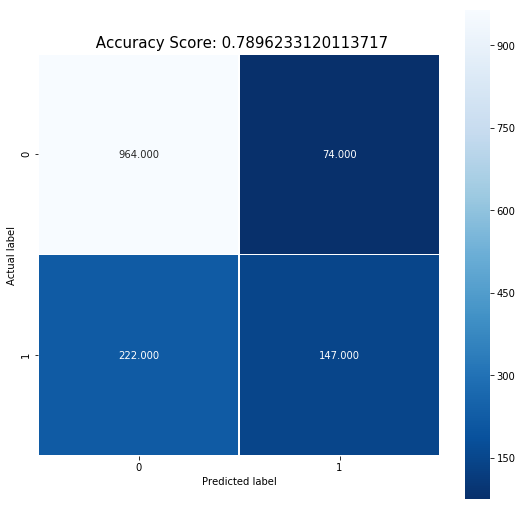

In [25]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_Processed(chi2)}---------------------------------"""


print ('\t\t--------------LOGISTIC REGRESSION_Processed(chi2)----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)

In [29]:
from sklearn.feature_selection import RFE

In [30]:
model = LogisticRegression()

In [35]:
rfe = RFE(model, 8)
fit = rfe.fit(X, Y)
print("Num Features:", fit.n_features_)
print("Selected Features:",fit.support_)
print("Feature Ranking:", fit.ranking_)

Num Features: 8
Selected Features: [False  True False False  True  True False False False False False False
 False False  True False False False  True False False False  True False
 False False False  True False False  True False False]
Feature Ranking: [23  1 24  6  1  1 19  8 17 11  9 10  2 26  1 13 14  3  1 15  5 12  1 18
 20 16 25  1  7 21  1  4 22]


In [54]:
temp_df = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X.columns],
                       "ranking" : rfe.ranking_,
                      })

In [55]:
temp_df

,rfe_support,columns,ranking
0,False,PaymentMethod_Credit card (automatic),23
1,True,PaymentMethod_Electronic check,1
2,False,PaymentMethod_Mailed check,24
3,False,PaperlessBilling_Yes,6
4,True,Contract_One year,1
5,True,Contract_Two year,1
6,False,StreamingMovies_No internet service,19
7,False,StreamingMovies_Yes,8
8,False,StreamingTV_No internet service,17
9,False,StreamingTV_Yes,11


In [58]:
selected_feat = temp_df[temp_df["rfe_support"] == True]["columns"].tolist()

In [59]:
selected_feat

['PaymentMethod_Electronic check',
 'Contract_One year',
 'Contract_Two year',
 'OnlineBackup_No internet service',
 'InternetService_Fiber optic',
 'PhoneService_Yes',
 'MonthlyCharges_x',
 'MonthlyCharges_y']

In [60]:
rfe_x=X[selected_feat]

In [63]:
rfe_x.shape

(7032, 8)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(rfe_x, Y, test_size=0.20, random_state=0)

In [65]:
logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       0.84      0.86      0.85      1038
          1       0.58      0.53      0.56       369

avg / total       0.77      0.78      0.77      1407

[[896 142]
 [172 197]]
tpr= [0.    0.534 1.   ]  and 1-fpr= [1.    0.863 0.   ]


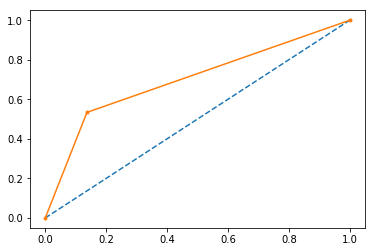

AUC: 0.699


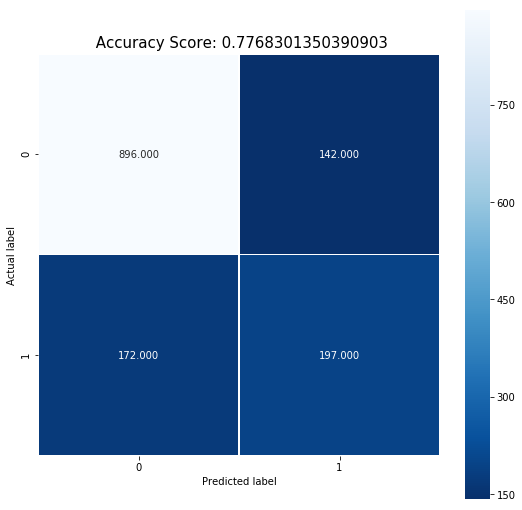

In [67]:
m=logit_rfe.fit(x_train,y_train)
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)